In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import PolynomialFeatures

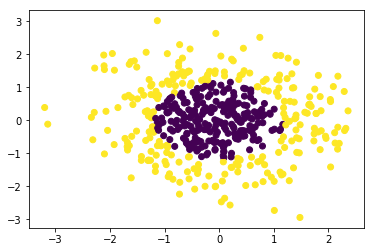

In [2]:
x_data,y_data = make_gaussian_quantiles(n_samples=500,n_features=2,n_classes=2)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()

In [3]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data,y_data)

C:\Users\张帅\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

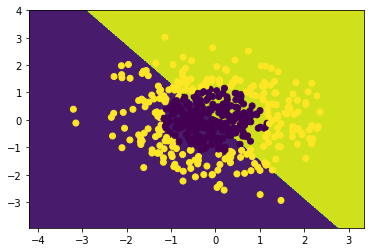

score: 0.51


In [4]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
z = logistic.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
cs = plt.contourf(xx,yy,z)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()
print('score:',logistic.score(x_data,y_data))

C:\Users\张帅\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


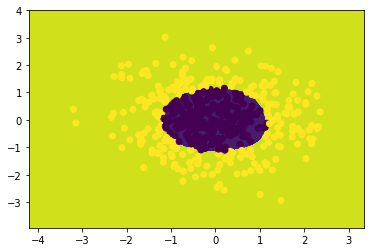

score: 0.994


In [7]:
poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(x_data)
logistic = linear_model.LogisticRegression()
logistic.fit(x_poly,y_data)
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = logistic.predict(poly_reg.fit_transform(np.c_[xx.ravel(),yy.ravel()]))
z = z.reshape(xx.shape)
cs = plt.contourf(xx,yy,z)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)
plt.show()
print('score:',logistic.score(x_poly,y_data))